In [21]:
import pandas as pd
from pprint import pprint

# Load the CSV file to check its content
file_path = 'steam_5_ids_1000_reviews.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Unnamed: 0,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location,timestamp_dev_responded,developer_response,app_id
0,0,158456131,"{'steamid': '76561198001366665', 'num_games_ow...",english,The only co-op game where you are scared of yo...,1708099453,1708099453,True,2711,1067,0.972446,0,True,False,False,True,NaN,NaN,NaN,553850
1,1,158015300,"{'steamid': '76561198980623081', 'num_games_ow...",english,"Worked so hard to save Super-Earth, only to be...",1707586995,1707586995,True,3477,1111,0.972198,48,True,False,False,True,NaN,NaN,NaN,553850
2,2,157891698,"{'steamid': '76561197962317612', 'num_games_ow...",english,"Thank you Jimmy525521,\nI will never forget th...",1707441205,1707441205,True,4733,1603,0.970314,0,True,False,False,True,NaN,NaN,NaN,553850
3,3,158229926,"{'steamid': '76561198814613226', 'num_games_ow...",english,"During the tutorial, I threw a grenade into a ...",1707832256,1707832256,True,8782,5705,0.969487,0,True,False,False,True,NaN,NaN,NaN,553850
4,4,158253018,"{'steamid': '76561198053299733', 'num_games_ow...",english,I'm from Buenos Aires and I say kill 'em all!,1707853843,1707853843,True,8331,2309,0.961765,0,False,False,False,True,NaN,NaN,NaN,553850


In [22]:
pprint(df['author'][0])

("{'steamid': '76561198001366665', 'num_games_owned': 0, 'num_reviews': 61, "
 "'playtime_forever': 1453, 'playtime_last_two_weeks': 1452, "
 "'playtime_at_review': 1436, 'last_played': 1708101889}")


The columns we have are:
- Recommendation id, which is a unique identification number for each the recommendations
- Author which contains a Json object identifying various aspects of the user:
    - steam id: the unique identification number of the user
    - num_games_owned: number of games this user has in their steam account
    - playtime last two weeks: how many hours they have played this game in the last two weeks
    - playtime at review: how many hours have they played while writing the review
    - last played: the last time this user played this game in Unix time
- language: language of the review
- timestamp_created: Unix time stamp of when this review has been created
- timestamp_updated: Unix time stamp of when this review was edited, same as timestamp_created if it was not updated
- voted_up: whether or not the game was voted up
- votes_up: how many likes this review has received
- votes_funny: how many 'funny' votes this review has received
- steam_purchase: whether or not this user purchased the game from steam
- received_for_free: whether or not this user received the game for free
- written_during_early_access: whether or not the review was written during early access
- hidden_in_steam_china: is it hidden in steam china
- steam_china_location: self explanatory 
- timestamp_dev_responded: Unix time stamp of when developer responded, NaN if the developer did not respond

In [23]:
import ast

# Define a function to safely parse the JSON-like strings in the 'author' column
def parse_json(json_str):
    try:
        return ast.literal_eval(json_str)
    except ValueError:
        return {}  # Return an empty dict in case of parsing error

# Apply the function to the 'author' column and create a new DataFrame from the results
author_details = df['author'].apply(parse_json).apply(pd.Series)

# Convert all columns to integers where applicable
author_details = author_details.apply(pd.to_numeric, errors='ignore', downcast='integer')

# Combine the original DataFrame with the new columns from author_details
df_combined = pd.concat([df, author_details], axis=1)

# Display the first few rows of the combined dataframe to verify the changes
df_combined = df_combined.drop(columns=['author'])
df_combined.head()


/var/folders/vf/bj9_k5jn0rg1yr7syrn5shtm0000gn/T/ipykernel_45403/3158457953.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  author_details = author_details.apply(pd.to_numeric, errors='ignore', downcast='integer')


,Unnamed: 0,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,...,timestamp_dev_responded,developer_response,app_id,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,0,158456131,english,The only co-op game where you are scared of yo...,1708099453,1708099453,True,2711,1067,0.972446,...,NaN,NaN,553850,76561198001366665,0,61,1453,1452,1436.0,1708101889
1,1,158015300,english,"Worked so hard to save Super-Earth, only to be...",1707586995,1707586995,True,3477,1111,0.972198,...,NaN,NaN,553850,76561198980623081,223,23,4079,3659,540.0,1708662313
2,2,157891698,english,"Thank you Jimmy525521,\nI will never forget th...",1707441205,1707441205,True,4733,1603,0.970314,...,NaN,NaN,553850,76561197962317612,545,23,5430,4765,364.0,1708763202
3,3,158229926,english,"During the tutorial, I threw a grenade into a ...",1707832256,1707832256,True,8782,5705,0.969487,...,NaN,NaN,553850,76561198814613226,43,2,661,661,26.0,1708585078
4,4,158253018,english,I'm from Buenos Aires and I say kill 'em all!,1707853843,1707853843,True,8331,2309,0.961765,...,NaN,NaN,553850,76561198053299733,499,18,3406,2742,1476.0,1708761391


In [32]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0  # Return a neutral sentiment in case of an error

# Apply the sentiment analysis function to the 'review' column
df_combined['sentiment_polarity'] = df_combined['review'].apply(calculate_sentiment)

# Display the first few rows of the dataframe to verify the sentiment scores
df_combined[['review', 'sentiment_polarity']].head()


,review,sentiment_polarity
0,The only co-op game where you are scared of yo...,0.033333
1,"Worked so hard to save Super-Earth, only to be...",-0.145833
2,"Thank you Jimmy525521,\nI will never forget th...",0.000000
3,"During the tutorial, I threw a grenade into a ...",-0.100000
4,I'm from Buenos Aires and I say kill 'em all!,0.000000


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

df_training = df_combined.drop(columns=['review', 'language', 'developer_response', 'steam_china_location'])
X = df_training.drop(columns=['sentiment_polarity'])
y = df_training['sentiment_polarity']
X_filled = X.fillna(X.mean())


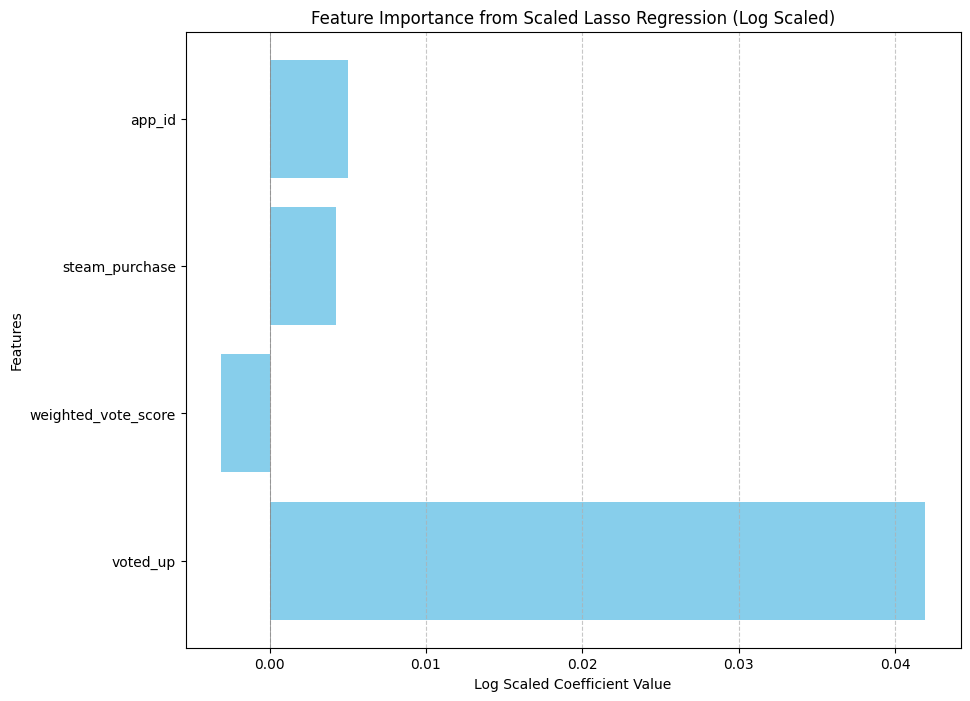

In [40]:
import numpy as np
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)
# Train the Linear Regression model
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Initialize Lasso model with the same alpha as before
lasso_regressor_scaled = Lasso(alpha=0.01)

# Fit the Lasso model on the standardized data
lasso_regressor_scaled.fit(X_train_scaled, y_train)

# Extract the coefficients and pair them with column names
scaled_lasso_coefficients = zip(X_train.columns, lasso_regressor_scaled.coef_)

# Filter out features with zero coefficients
important_features_scaled = [(feature, coeff) for feature, coeff in scaled_lasso_coefficients if coeff != 0]

# Visualizing the important features with their coefficients
features_scaled, coefficients_scaled = zip(*important_features_scaled)
adjusted_coefficients_scaled = np.sign(coefficients_scaled) * np.log(np.abs(coefficients_scaled) + 1)

plt.figure(figsize=(10, 8))
plt.barh(features_scaled, adjusted_coefficients_scaled, color='skyblue')
plt.xlabel('Log Scaled Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance from Scaled Lasso Regression (Log Scaled)')
plt.axvline(x=0, color='grey', linewidth=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


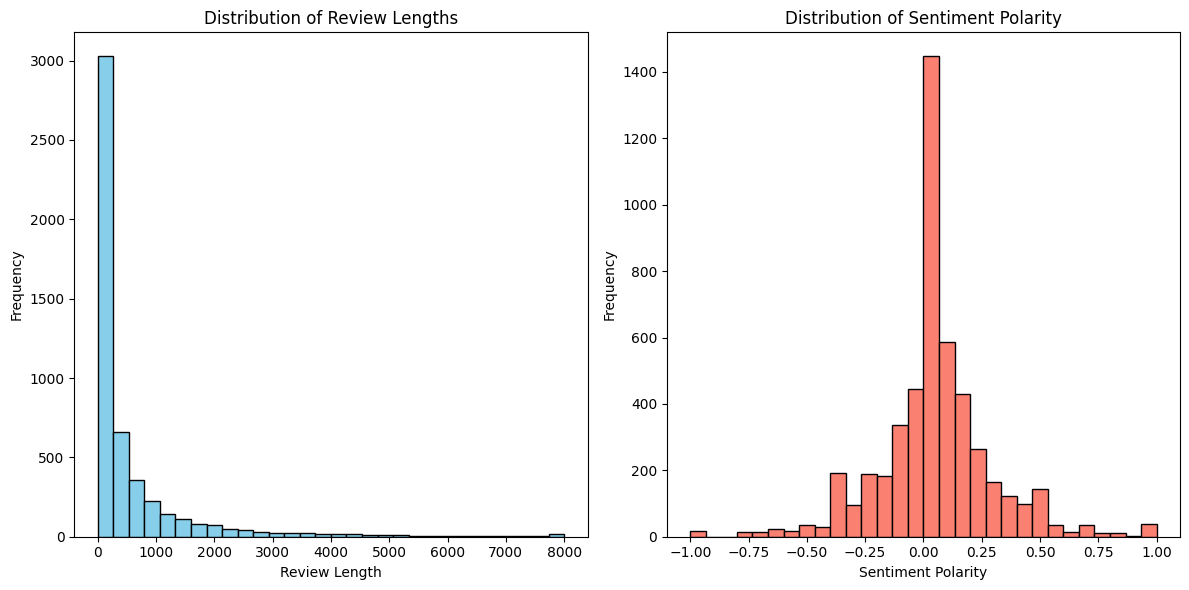

(        Unnamed: 0  recommendationid  timestamp_created  timestamp_updated  \
 count  5000.000000      5.000000e+03       5.000000e+03       5.000000e+03   
 mean    499.500000      9.580133e+07       1.608269e+09       1.617329e+09   
 std     288.703862      5.271936e+07       9.799329e+07       9.330782e+07   
 min       0.000000      2.747000e+03       1.313001e+09       1.313001e+09   
 25%     249.750000      4.471229e+07       1.536838e+09       1.556523e+09   
 50%     499.500000      9.984798e+07       1.632423e+09       1.642108e+09   
 75%     749.250000      1.531873e+08       1.702106e+09       1.705690e+09   
 max     999.000000      1.591262e+08       1.708760e+09       1.708760e+09   
 
            votes_up   votes_funny  weighted_vote_score  comment_count  \
 count   5000.000000   5000.000000          5000.000000    5000.000000   
 mean     326.247000    152.626400             0.721961      10.392800   
 std     1006.754117    873.420281             0.122542      49.7

In [41]:
descriptive_statistics = df_combined.describe()

# Distribution of Review Lengths
# Calculating the length of each review
df_combined['review_length'] = df_combined['review'].apply(len)

# Setting up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the distribution of review lengths
plt.subplot(1, 2, 1)
plt.hist(df_combined['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

# Distribution of Sentiment Scores
plt.subplot(1, 2, 2)
plt.hist(df_combined['sentiment_polarity'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

descriptive_statistics, df_combined['review_length'].describe()

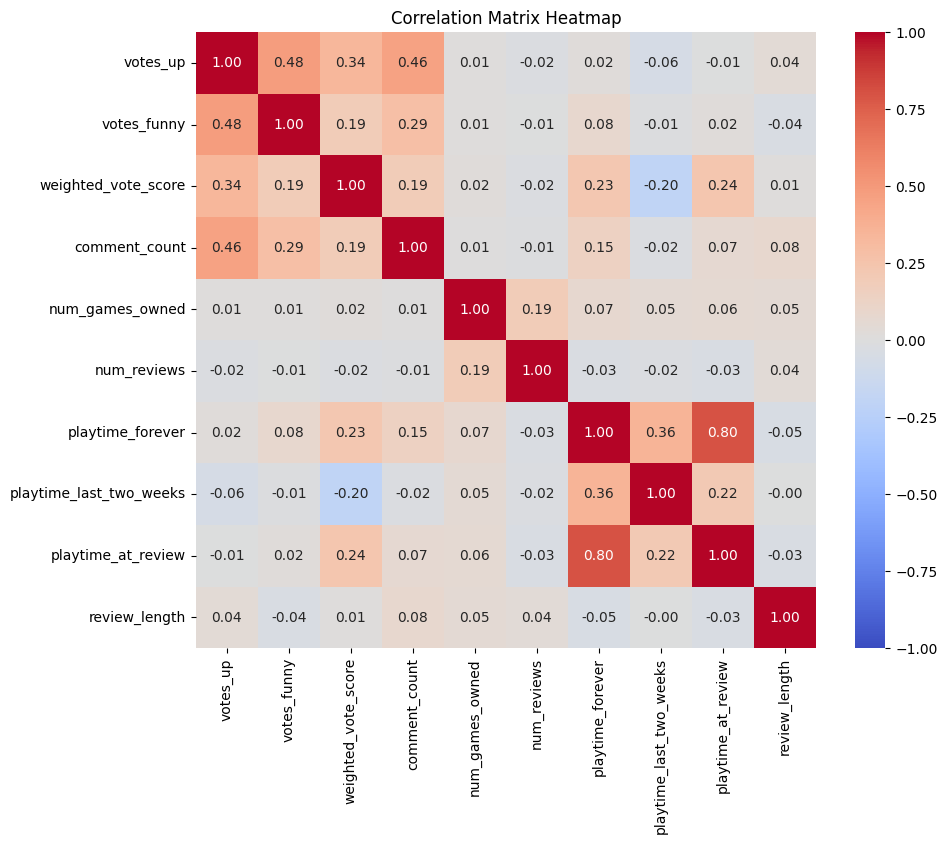

In [42]:
import seaborn as sns

# Selecting numerical columns for correlation analysis (excluding IDs and timestamp columns for relevance)
numerical_columns = ['votes_up', 'votes_funny', 'weighted_vote_score', 'comment_count',
                    'num_games_owned', 'num_reviews', 'playtime_forever', 
                    'playtime_last_two_weeks', 'playtime_at_review', 'review_length']

# Compute the correlation matrix for selected numerical features
corr_matrix = df_combined[numerical_columns].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


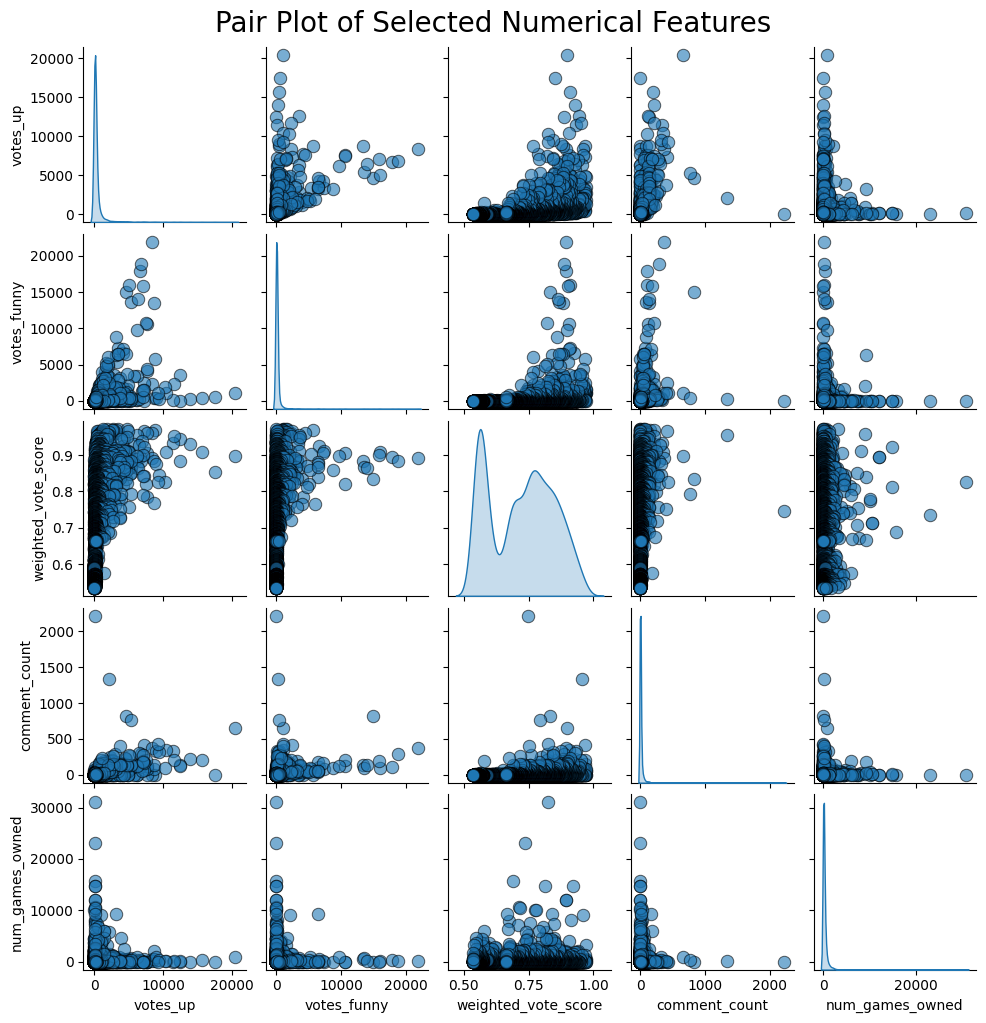

In [44]:
subset_numerical_columns = numerical_columns[:5]  # Adjust the number of columns as needed

# Create pair plots
sns.pairplot(df_combined[subset_numerical_columns], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height=2)

plt.suptitle('Pair Plot of Selected Numerical Features', size=20, y=1.02)
plt.show()


In [46]:
# Re-defining the clustering features in case they were missed earlier
clustering_features = ['playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'num_reviews']
clustering_data = df_combined[clustering_features].fillna(0)  # Handling NaN values by replacing them with 0

# Standardizing the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(clustering_scaled)

# Adding the cluster labels to the dataframe
df_combined['dbscan_cluster'] = clusters

# Analyzing the resulting clusters
cluster_counts = df_combined['dbscan_cluster'].value_counts()

cluster_counts  # Displaying the counts of points in each cluster

dbscan_cluster
 0    4808
-1     181
 2       6
 1       5
Name: count, dtype: int64

In [47]:
if 'sentiment_score' not in df_combined.columns:
    df_combined['sentiment_score'] = np.random.rand(len(df_combined))  # Placeholder, remove if actual data exists

cluster_averages = df_combined.groupby('dbscan_cluster')[['sentiment_score', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review']].mean()

cluster_averages

,sentiment_score,playtime_forever,playtime_last_two_weeks,playtime_at_review
dbscan_cluster,,,,
-1,0.504128,878708.569061,5186.834254,379518.729282
0,0.507371,75519.350042,809.845674,44216.219680
1,0.384186,217497.200000,214.000000,134131.400000
2,0.550250,740285.000000,353.500000,48096.500000


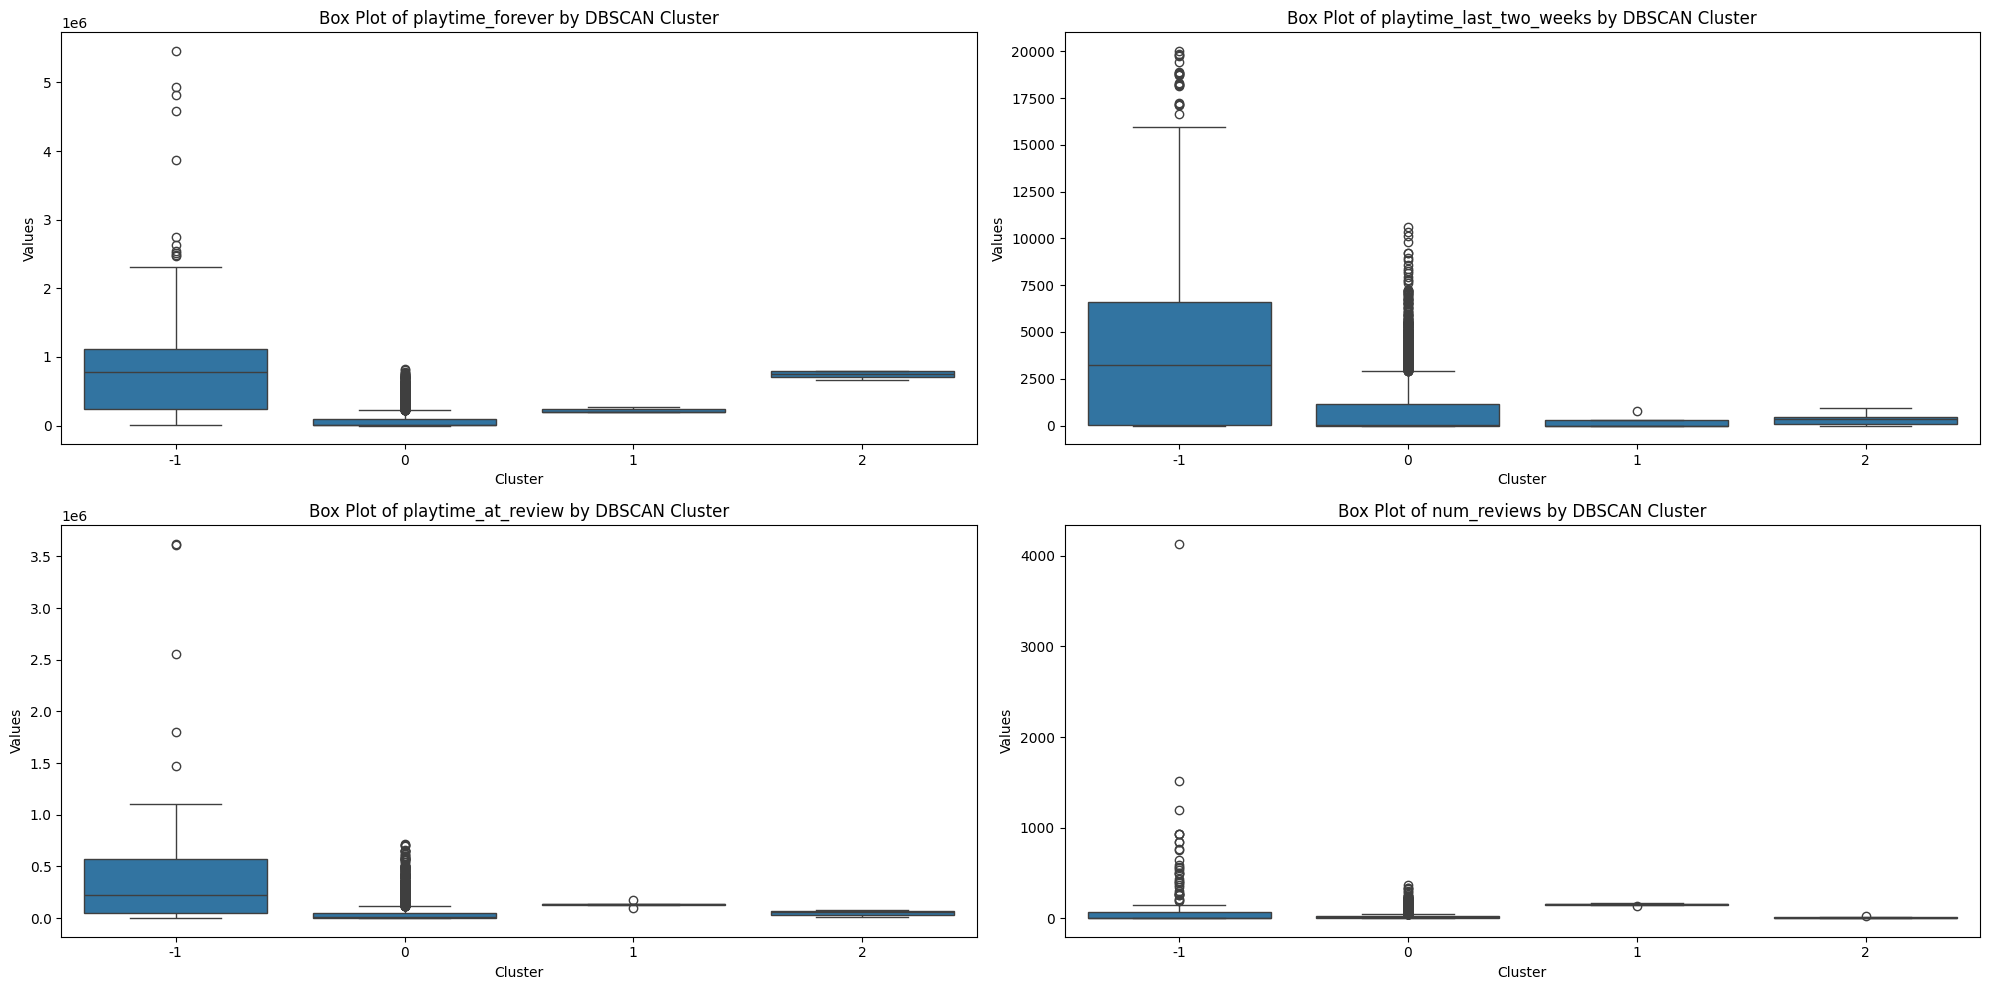

In [48]:
# Setting up the matplotlib figure
plt.figure(figsize=(20, 10))

# Creating box plots for each feature across the clusters
for i, feature in enumerate(clustering_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='dbscan_cluster', y=feature, data=df_combined)
    plt.title(f'Box Plot of {feature} by DBSCAN Cluster')
    plt.ylabel('Values')
    plt.xlabel('Cluster')

plt.tight_layout()
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Preparing the feature matrix and target vector
X = clustering_scaled  # Features already scaled previously
y = df_combined['dbscan_cluster']  # Cluster labels from DBSCAN

# Since DBSCAN may label some points as noise (-1), we'll exclude those from our training data
X_clean = X[y != -1]
y_clean = y[y != -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predicting the clusters for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.9986168741355463,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1442\n           1       1.00      0.50      0.67         2\n           2       1.00      0.50      0.67         2\n\n    accuracy                           1.00      1446\n   macro avg       1.00      0.67      0.78      1446\nweighted avg       1.00      1.00      1.00      1446\n')